# SCINApy示例

## 加载示例数据

In [1]:
from SCINApy import load_sample_data

adata, signatures = load_sample_data()
adata.obs

,true_label
TCGTTATGGGTGGA.1,cd14_monocytes
TGACGAACTGGTGT.1,cd14_monocytes
CTGAAGTGCAGTCA.1,cd14_monocytes
GTAGACTGTACGAC.1,cd14_monocytes
AGCATGACAAGTAG.1,cd14_monocytes
...,...
ACCGCGGAAACAGA.1,unknown
GAAAGTGAAGTCGT.1,unknown
CGCTACACTTCAGG.1,unknown
GAGGGCCTGCTTCC.1,unknown


## SCINA算法自动注释

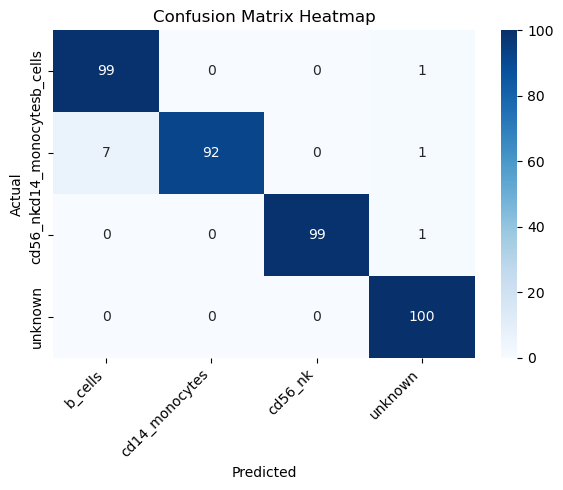

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from SCINApy import SCINA

# 输出结果label
SCINA(adata=adata, signatures=signatures, inplace=True)

# 获取类别标签
labels = sorted(set(adata.obs["true_label"]))

# 定义混淆矩阵
conf_matrix = confusion_matrix(adata.obs["true_label"].to_list(), adata.obs['scina_labels'].to_list(), labels=labels)

# 绘制热图
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=labels, yticklabels=labels, cbar=True)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# 保存热图为 PNG
plt.savefig("data/confusion_matrix_heatmap_python.png")
plt.show()

有些文章里提供的marker基因格式不是使用标准的json格式，我们这里也提供了对应的转换函数

In [3]:
from SCINApy.utils import preprocess_signatures

preprocess_signatures("data/signatures.csv")

{'cd14_monocytes': ['AIF1',
  'CST3',
  'FCN1',
  'FTH1',
  'FTL',
  'GPX1',
  'LST1',
  'LYZ',
  'S100A8',
  'S100A9',
  'TYMP'],
 'b_cells': ['CD37', 'CD74', 'CD79A', 'CD79B', 'HLA-DPA1', 'HLA-DRA'],
 'cd56_nk': ['CLIC3',
  'CST7',
  'FGFBP2',
  'GNLY',
  'GZMA',
  'GZMB',
  'HOPX',
  'IFITM2',
  'KLRB1',
  'NKG7',
  'PRF1']}

## 可视化结果

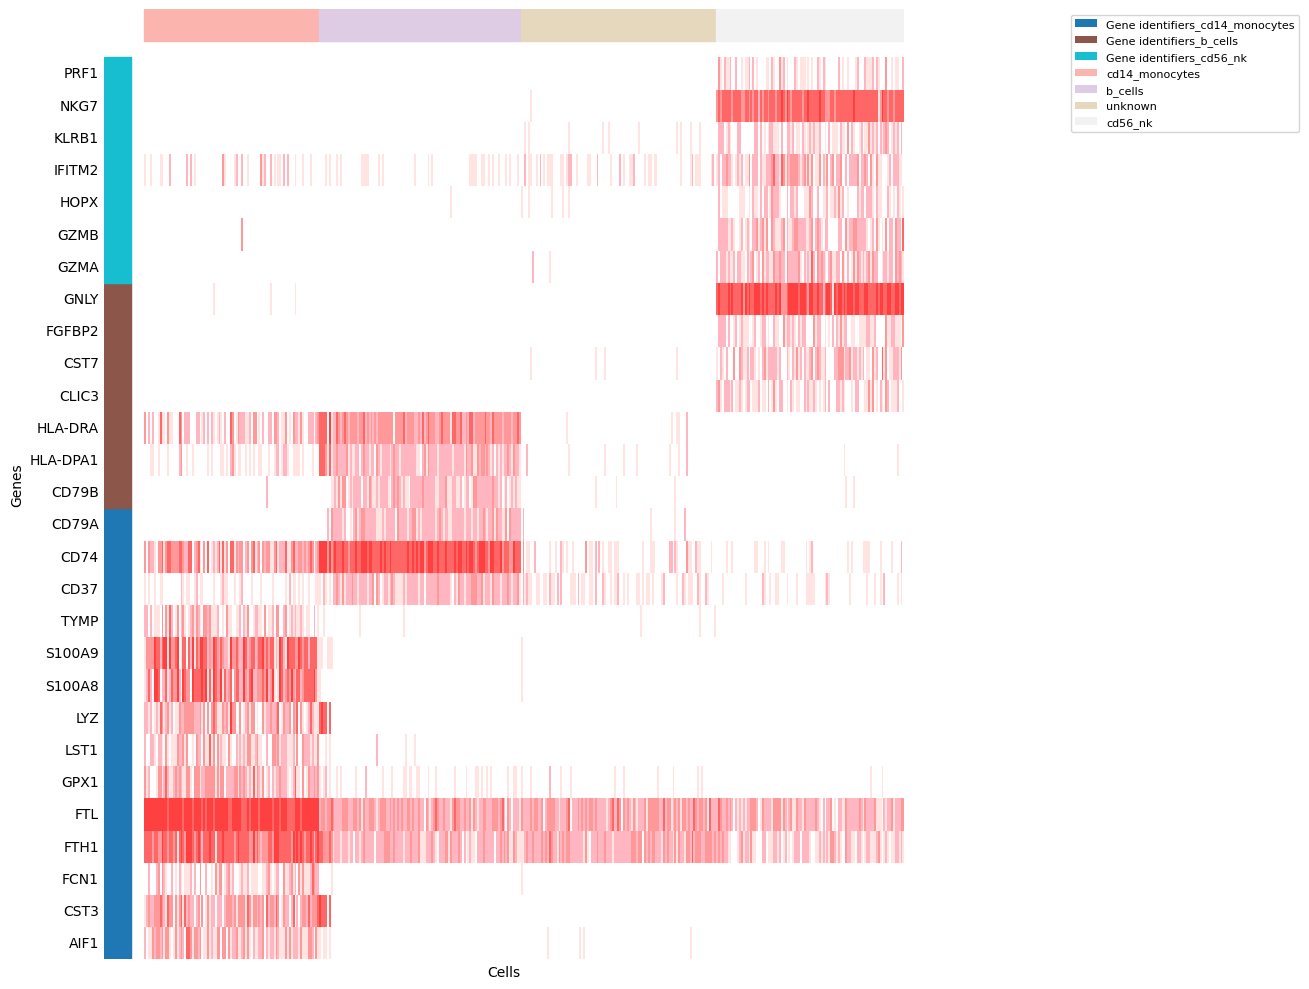

In [4]:
from SCINApy import plotheat_scina

plotheat_scina(adata=adata, signatures=signatures, legend_bbox_to_anchor=(1.5, 1))